# Problem Statement

Plant Pathology 2021 - FGVC8 is a [Kaggle competition](https://www.kaggle.com/c/plant-pathology-2021-fgvc8) launched on march 15 2021 and closed on mai 27 2021. 

## Specific Objectives
The main objective of the competition is to develop machine learning-based models to accurately classify a given leaf image from the test dataset to a particular disease category, and to identify an individual disease from multiple disease symptoms on a single leaf image.

### Librairies

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.image as img

In [2]:
# loading data from directory
train = pd.read_csv("../input/plant-pathology-2021-fgvc8/train.csv")

train.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


In [3]:
# looking at basic infos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18632 entries, 0 to 18631
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   18632 non-null  object
 1   labels  18632 non-null  object
dtypes: object(2)
memory usage: 291.2+ KB


In [4]:
# Checking the number of images
print("Number of images:",len(train))

Number of images: 18632


## Sample images

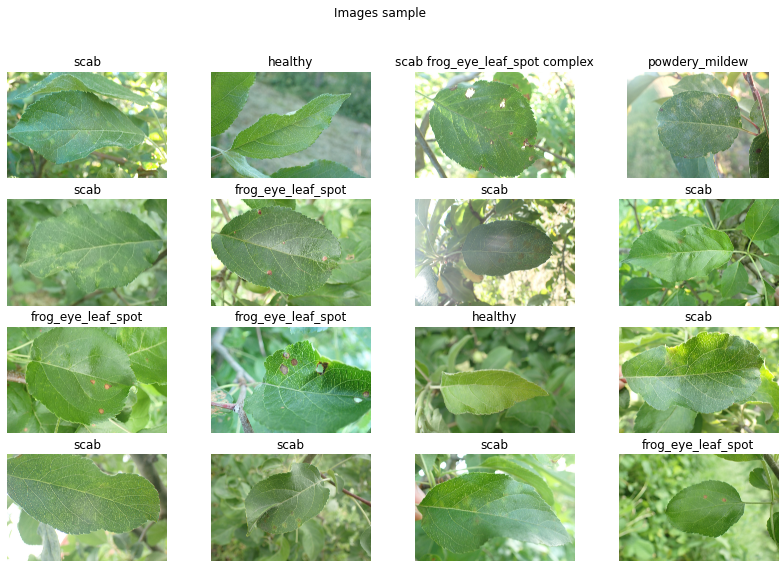

In [5]:
# preparing the path to images
train["path"] = "../input/plant-pathology-2021-fgvc8/train_images/" + train["image"]

# taking a sample of the dataset
data_sample = train.sample(16)

# Showing image sample
plt.figure(figsize=(14,9))
n=1
for i in data_sample.index :
    plt.subplot(4,4,n)
    
    testImage = img.imread(data_sample["path"][i])

    # displaying the image
    plt.imshow(testImage)

    plt.title(data_sample["labels"][i])
    plt.axis("off")
    n+=1
_ = plt.suptitle("Images sample")

## Labels exploration
### Raw labels

In [6]:
# Preparing labels comlumns to exploration

def get_list(string):
    list = []
    list.append(string)
    return list

train["labels_long"] = train["labels"].apply(get_list)

train["labels"] = train["labels"].astype("str")

train["labels"] = train["labels"].str.split(" ")



Number of labels: 12
['complex' 'frog_eye_leaf_spot' 'frog_eye_leaf_spot complex' 'healthy'
 'powdery_mildew' 'powdery_mildew complex' 'rust' 'rust complex'
 'rust frog_eye_leaf_spot' 'scab' 'scab frog_eye_leaf_spot'
 'scab frog_eye_leaf_spot complex']


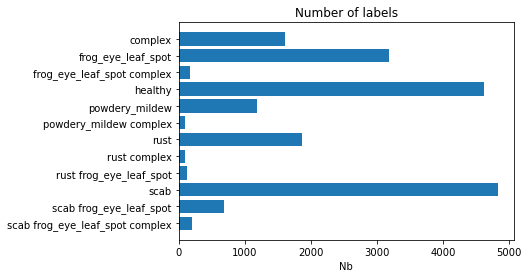

Ratio of labels
complex                            0.085981
frog_eye_leaf_spot                 0.170728
frog_eye_leaf_spot complex         0.008856
healthy                            0.248175
powdery_mildew                     0.063547
powdery_mildew complex             0.004669
rust                               0.099828
rust complex                       0.005206
rust frog_eye_leaf_spot            0.006441
scab                               0.259017
scab frog_eye_leaf_spot            0.036818
scab frog_eye_leaf_spot complex    0.010734
dtype: float64


In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

def labels_plot(labels):
    """ Takes the labels columns and plot a bar graph of values,
    print number of unique labels and their respective ratio.
    arg : label columns  """   
    
    # converting each label into a column
    mlb = MultiLabelBinarizer()

    labels = mlb.fit_transform(train[labels])

    labels_df =  pd.DataFrame(labels,columns=mlb.classes_, index=train.index)
    
    print("Number of labels:",len(mlb.classes_))
    print(mlb.classes_)
    
    # summing the 
    labels_count = labels_df.sum()

    fig, ax = plt.subplots()

    # Example data
    labs = labels_count.index
    y_pos = np.arange(len(labs))
    counts = labels_count


    ax.barh(y_pos, counts)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labs)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Nb')
    ax.set_title('Number of labels')

    plt.show()

    print("Ratio of labels")
    
    print(labels_count / len(train))
    
labels_plot("labels_long")

### Labels

Number of labels: 6
['complex' 'frog_eye_leaf_spot' 'healthy' 'powdery_mildew' 'rust' 'scab']


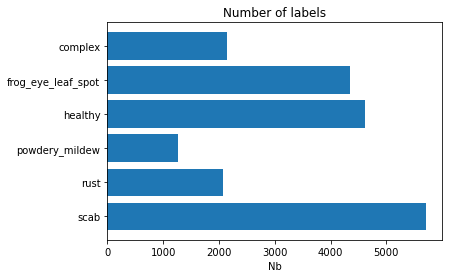

Ratio of labels
complex               0.115447
frog_eye_leaf_spot    0.233577
healthy               0.248175
powdery_mildew        0.068216
rust                  0.111475
scab                  0.306569
dtype: float64


In [8]:
labels_plot("labels")

### EDA conclusion

We have 12 labels combinaisons made out of 6 labels.
In the training phase, our choice will be to use a multilabels classification approach. Therefore to predict each label independently.